In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR-Employee-Data.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.shape

(1470, 35)

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#nunique returns the number of unique elements
#dataframe consisting of all features and their unique values
dfFeatures = []
for i in df.columns:
    dfFeatures.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(dfFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1,[1]
9,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


<AxesSubplot:>

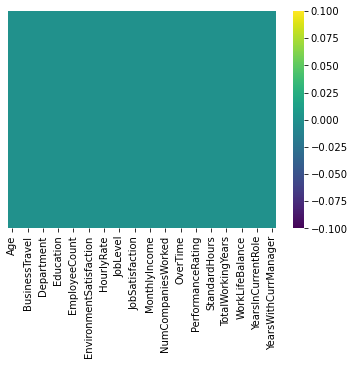

In [8]:
#heatmap to visualise missing values
sns.heatmap(df.isnull(),yticklabels = False, cmap = 'viridis')

Thus, no missing values.

## Data Preprocessing

Encoding is required for Attrition, BusineesTravel, Department, EducationField, Gender, JobRole, MartialStatus and OverTime.
We will be dropping EmployeeCount, Over18 and StandardHours because they have same value throughout.

In [9]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 'columns', inplace = True)

In [10]:
df.shape

(1470, 32)

In [11]:
df['Attrition'].replace(to_replace = 'Yes', value = '1', inplace = True)
df['Attrition'].replace(to_replace = 'No', value = '0', inplace = True)

In [12]:
df['OverTime'].replace(to_replace = 'Yes', value = '1', inplace = True)
df['OverTime'].replace(to_replace = 'No', value = '0', inplace = True)

In [13]:
df['Gender'].replace(to_replace = 'Female', value = '1', inplace = True)
df['Gender'].replace(to_replace = 'Male', value = '0', inplace = True)

The encoding of the rest of the variables will be done through one hot encoding via get_dummies (for Department, EducationField, JobRole, MaritallStatus) and LabelEncoder (for Business Travel).

In [14]:
df = pd.get_dummies(df, columns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first = True)

In [15]:
df.shape

(1470, 45)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb = LabelEncoder()

In [18]:
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRol

In [20]:
df.drop(['EmployeeNumber'], axis = 'columns', inplace = True)

We are now done with encoding and dropping of variables which are not necessary.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

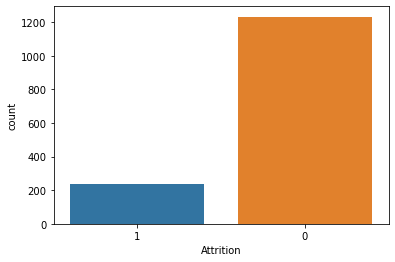

In [21]:
sns.countplot(data = df, x = 'Attrition')

The dataset is imbalanced. This can be treated by doing undersampling or oversampling. But we will skip that for the time being.

As for the models, I will use two algorithms: KNN and Random Forest.

## Feature Selection

We will be going forward with univariate method for feature selection, in which we only select 'k' best attributes which have the strongest relationship with the target variable. Chi square test is done for this purpose.

In [22]:
from sklearn.feature_selection import SelectKBest, chi2 

In [23]:
X = df.drop(['Attrition'], axis = 'columns') #independent
y = df['Attrition'] #target

In [24]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sa

In [25]:
#will extract top 15 highest score features
bestfeatures = SelectKBest(score_func = chi2, k = 15)
fit = bestfeatures.fit(X,y)

In [26]:
dfscores = pd.DataFrame(fit.scores_) #scores wrt chi2 test for each feature considering target 
dfcolumns = pd.DataFrame(X.columns)

In [27]:
featureScores = pd.concat([dfcolumns,dfscores], axis = 'columns')
featureScores.columns = ['Feature Name', 'Score']

In [28]:
featureScores

,Feature Name,Score
0,Age,84.155277
1,BusinessTravel,0.000002
2,DailyRate,956.580494
3,DistanceFromHome,63.772142
4,Education,0.520642
5,EnvironmentSatisfaction,6.890594
6,Gender,0.765130
7,HourlyRate,0.431779
8,JobInvolvement,4.605616
9,JobLevel,24.939242


In [29]:
#top 15 features
print(featureScores.nlargest(15,'Score'))

                     Feature Name          Score
11                  MonthlyIncome  127922.293694
12                    MonthlyRate    1196.633553
2                       DailyRate     956.580494
19              TotalWorkingYears     230.721618
22                 YearsAtCompany     142.100054
23             YearsInCurrentRole     117.522596
25           YearsWithCurrManager     110.671534
0                             Age      84.155277
14                       OverTime      63.845067
3                DistanceFromHome      63.772142
40   JobRole_Sales Representative      34.290268
42           MaritalStatus_Single      30.771669
18               StockOptionLevel      25.268826
9                        JobLevel      24.939242
34  JobRole_Laboratory Technician      11.699495


These are the selected features for our model.

In [30]:
X = df[['MonthlyIncome','MonthlyRate', 'DailyRate', 'TotalWorkingYears', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome',
        'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
        'JobRole_Manufacturing Director', 'JobRole_Research Director',
        'JobRole_Research Scientist', 'JobRole_Sales Executive',
        'JobRole_Sales Representative', 'MaritalStatus_Married',
        'MaritalStatus_Single', 'StockOptionLevel', 'JobLevel']]

In [31]:
X.columns

Index(['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Age',
       'OverTime', 'DistanceFromHome', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'StockOptionLevel', 'JobLevel'],
      dtype='object')

In [32]:
y = df['Attrition']

# Prediction Models with K folds Cross Validation

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [35]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 3)
print(cross_val_score(rf, X, y, cv = 10, scoring = 'accuracy').mean())

0.8455782312925171


In [36]:
knn = KNeighborsClassifier(n_neighbors = 6)
print(cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean())

0.8421768707482993


# Removing Imbalance in Dataset

In [37]:
#extracting the 0 and 1 of attrition variable
yes = df[df['Attrition'] == '1']
no = df[df['Attrition'] == '0']

In [38]:
print(yes.shape, no.shape)

(237, 44) (1233, 44)


#### UnderSampling Approach

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler()

In [41]:
X_res, y_res = rus.fit_resample(X,y)

In [42]:
print(X_res.shape, y_res.shape)

(474, 22) (474,)


#### Using the sampled data for our models

In [43]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5)
print(cross_val_score(rf, X_res, y_res, cv = 10, scoring = 'accuracy').mean())

0.7066489361702128


In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)
print(cross_val_score(knn, X_res, y_res, cv = 10, scoring = 'accuracy').mean())

0.5611702127659575


Here we notice that the accuracy of the model decreased drastically. This may be because of loss of some critical data points due to undersampling.

#### Upsampling Approach

In [45]:
from imblearn.combine import SMOTETomek

In [46]:
smk = SMOTETomek(random_state =23)

In [47]:
X_res2, y_res2 = smk.fit_resample(X,y)

In [48]:
print(X_res2.shape, y_res2.shape)

(2298, 22) (2298,)


#### Using the sampled data for our models

In [49]:
rf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth = 4)
print(cross_val_score(rf, X_res2, y_res2, cv = 10, scoring = 'accuracy').mean())

0.8337801404974368


In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
print(cross_val_score(knn, X_res2, y_res2, cv = 10, scoring = 'accuracy').mean())

0.8202715018036834


The results are much better in this approach as compared to the undersampling method.